In [1]:
#nessessary imports
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn import svm

In [2]:
# import dataset
data= pd.read_csv("https://raw.githubusercontent.com/sg758253/IDS/main/HW7/dermatology.csv")

# display all columns
pd.set_option('display.max_columns',None)
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25.0,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36.0,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28.0,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50.0,3


In [3]:
# describe dataset
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,358.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,36.296089,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,15.324557,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,49.750000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000,6.000000


In [4]:
# to show datatype of each class
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [5]:
# check null values
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [6]:
#lets use the median to fill age
data['age'].fillna(value=data['age'].median(), inplace=True)

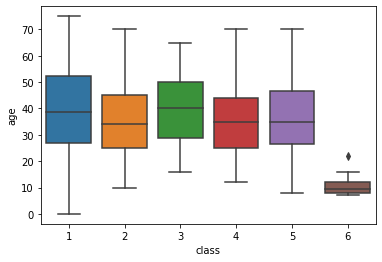

In [7]:
sns.boxplot(data=data,y='age',x='class')

In [8]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
#Dropping specified labels from rows or columns for age and class
twoDataFields=data.drop(['age','class'],axis=1)

In [9]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
#for loop for the contingency tables for each of the classes
for i in twoDataFields:
  display(data.groupby(['class',(i)])[(i)].agg('count').unstack())
  print("next")

erythema,0,1,2,3
class,,,,
1,1.0,7.0,63.0,41.0
2,NaN,5.0,34.0,22.0
3,1.0,7.0,49.0,15.0
4,NaN,11.0,32.0,6.0
5,2.0,25.0,22.0,3.0
6,NaN,2.0,15.0,3.0


next


scaling,0,1,2,3
class,,,,
1,NaN,13.0,64.0,35.0
2,NaN,7.0,43.0,11.0
3,2.0,28.0,37.0,5.0
4,NaN,24.0,25.0,NaN
5,6.0,34.0,11.0,1.0
6,NaN,5.0,15.0,NaN


next


definite_borders,0,1,2,3
class,,,,
1,NaN,14.0,73.0,25.0
2,21.0,22.0,18.0,NaN
3,1.0,10.0,42.0,19.0
4,9.0,22.0,18.0,NaN
5,23.0,16.0,11.0,2.0
6,5.0,9.0,6.0,NaN


next


itching,0,1,2,3
class,,,,
1,55.0,22.0,21.0,14.0
2,9.0,16.0,25.0,11.0
3,2.0,9.0,28.0,33.0
4,33.0,10.0,5.0,1.0
5,8.0,7.0,20.0,17.0
6,11.0,8.0,1.0,NaN


next


koebner_phenomenon,0,1,2,3
class,,,,
1,63.0,27.0,18.0,4.0
2,60.0,NaN,1.0,NaN
3,20.0,18.0,23.0,11.0
4,9.0,25.0,12.0,3.0
5,52.0,NaN,NaN,NaN
6,20.0,NaN,NaN,NaN


next


polygonal_papules,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,61.0,NaN,NaN,NaN
3,3.0,1.0,41.0,27.0
4,49.0,NaN,NaN,NaN
5,52.0,NaN,NaN,NaN
6,20.0,NaN,NaN,NaN


next


follicular_papules,0,1,2,3
class,,,,
1,109.0,2.0,1.0,NaN
2,60.0,1.0,NaN,NaN
3,72.0,NaN,NaN,NaN
4,49.0,NaN,NaN,NaN
5,43.0,6.0,3.0,NaN
6,NaN,2.0,12.0,6.0


next


oral_mucosal_involvement,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,61.0,NaN,NaN,NaN
3,5.0,9.0,45.0,13.0
4,49.0,NaN,NaN,NaN
5,52.0,NaN,NaN,NaN
6,20.0,NaN,NaN,NaN


next


knee_and_elbow_involvement,0,1,2,3
class,,,,
1,23.0,15.0,54.0,20.0
2,57.0,4.0,NaN,NaN
3,71.0,NaN,1.0,NaN
4,49.0,NaN,NaN,NaN
5,50.0,2.0,NaN,NaN
6,1.0,7.0,9.0,3.0


next


scalp_involvement,0,1,2,3
class,,,,
1,23.0,23.0,50.0,16.0
2,56.0,3.0,2.0,NaN
3,70.0,2.0,NaN,NaN
4,49.0,NaN,NaN,NaN
5,52.0,NaN,NaN,NaN
6,14.0,2.0,4.0,NaN


next


family_history,0,1
class,,
1,80.0,32.0
2,58.0,3.0
3,71.0,1.0
4,49.0,NaN
5,52.0,NaN
6,10.0,10.0


next


melanin_incontinence,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,61.0,NaN,NaN,NaN
3,2.0,8.0,46.0,16.0
4,49.0,NaN,NaN,NaN
5,52.0,NaN,NaN,NaN
6,20.0,NaN,NaN,NaN


next


eosinophils_in_the_infiltrate,0,1,2
class,,,
1,109.0,2.0,1.0
2,39.0,16.0,6.0
3,62.0,8.0,2.0
4,46.0,3.0,NaN
5,48.0,4.0,NaN
6,20.0,NaN,NaN


next


pnl_infiltrate,0,1,2,3
class,,,,
1,34.0,37.0,35.0,6.0
2,17.0,23.0,20.0,1.0
3,72.0,NaN,NaN,NaN
4,43.0,6.0,NaN,NaN
5,52.0,NaN,NaN,NaN
6,17.0,3.0,NaN,NaN


next


fibrosis_of_the_papillary_dermis,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,61.0,NaN,NaN,NaN
3,70.0,NaN,2.0,NaN
4,49.0,NaN,NaN,NaN
5,NaN,8.0,21.0,23.0
6,20.0,NaN,NaN,NaN


next


exocytosis,0,1,2,3
class,,,,
1,93.0,8.0,11.0,NaN
2,1.0,7.0,32.0,21.0
3,1.0,6.0,38.0,27.0
4,1.0,8.0,28.0,12.0
5,20.0,20.0,12.0,NaN
6,2.0,8.0,8.0,2.0


next


acanthosis,0,1,2,3
class,,,,
1,1.0,14.0,70.0,27.0
2,4.0,14.0,35.0,8.0
3,1.0,9.0,43.0,19.0
4,4.0,19.0,26.0,NaN
5,NaN,7.0,25.0,20.0
6,NaN,8.0,11.0,1.0


next


hyperkeratosis,0,1,2,3
class,,,,
1,53.0,30.0,25.0,4.0
2,50.0,10.0,NaN,1.0
3,54.0,15.0,3.0,NaN
4,37.0,9.0,3.0,NaN
5,27.0,14.0,11.0,NaN
6,6.0,12.0,2.0,NaN


next


parakeratosis,0,1,2,3
class,,,,
1,1.0,20.0,69.0,22.0
2,24.0,17.0,17.0,3.0
3,15.0,32.0,20.0,5.0
4,17.0,27.0,5.0,NaN
5,27.0,11.0,14.0,NaN
6,2.0,11.0,7.0,NaN


next


clubbing_of_the_rete_ridges,0,1,2,3
class,,,,
1,3.0,15.0,60.0,34.0
2,61.0,NaN,NaN,NaN
3,72.0,NaN,NaN,NaN
4,49.0,NaN,NaN,NaN
5,49.0,2.0,1.0,NaN
6,18.0,2.0,NaN,NaN


next


elongation_of_the_rete_ridges,0,1,2,3
class,,,,
1,NaN,11.0,61.0,40.0
2,54.0,4.0,3.0,NaN
3,72.0,NaN,NaN,NaN
4,49.0,NaN,NaN,NaN
5,5.0,6.0,31.0,10.0
6,18.0,2.0,NaN,NaN


next


thinning_of_the_suprapapillary_epidermis,0,1,2,3
class,,,,
1,4.0,17.0,60.0,31.0
2,60.0,1.0,NaN,NaN
3,72.0,NaN,NaN,NaN
4,49.0,NaN,NaN,NaN
5,51.0,1.0,NaN,NaN
6,20.0,NaN,NaN,NaN


next


spongiform_pustule,0,1,2,3
class,,,,
1,52.0,30.0,24.0,6.0
2,53.0,6.0,2.0,NaN
3,72.0,NaN,NaN,NaN
4,49.0,NaN,NaN,NaN
5,51.0,1.0,NaN,NaN
6,19.0,1.0,NaN,NaN


next


munro_microabcess,0,1,2,3
class,,,,
1,34.0,36.0,33.0,9.0
2,61.0,NaN,NaN,NaN
3,71.0,NaN,NaN,1.0
4,48.0,1.0,NaN,NaN
5,52.0,NaN,NaN,NaN
6,20.0,NaN,NaN,NaN


next


focal_hypergranulosis,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,61.0,NaN,NaN,NaN
3,2.0,12.0,43.0,15.0
4,49.0,NaN,NaN,NaN
5,52.0,NaN,NaN,NaN
6,19.0,1.0,NaN,NaN


next


disappearance_of_the_granular_layer,0,1,2,3
class,,,,
1,46.0,12.0,40.0,14.0
2,61.0,NaN,NaN,NaN
3,63.0,1.0,8.0,NaN
4,31.0,17.0,1.0,NaN
5,52.0,NaN,NaN,NaN
6,20.0,NaN,NaN,NaN


next


vacuolisation_and_damage_of_basal_layer,0,1,2,3
class,,,,
1,111.0,1.0,NaN,NaN
2,61.0,NaN,NaN,NaN
3,1.0,2.0,43.0,26.0
4,49.0,NaN,NaN,NaN
5,52.0,NaN,NaN,NaN
6,20.0,NaN,NaN,NaN


next


spongiosis,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,4.0,2.0,35.0,20.0
3,35.0,6.0,20.0,11.0
4,2.0,7.0,31.0,9.0
5,40.0,7.0,4.0,1.0
6,6.0,6.0,6.0,2.0


next


saw-tooth_appearance_of_retes,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,61.0,NaN,NaN,NaN
3,1.0,4.0,40.0,27.0
4,48.0,1.0,NaN,NaN
5,52.0,NaN,NaN,NaN
6,20.0,NaN,NaN,NaN


next


follicular_horn_plug,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,60.0,1.0,NaN,NaN
3,71.0,1.0,NaN,NaN
4,49.0,NaN,NaN,NaN
5,51.0,1.0,NaN,NaN
6,1.0,7.0,8.0,4.0


next


perifollicular_parakeratosis,0,1,2,3
class,,,,
1,112.0,NaN,NaN,NaN
2,60.0,1.0,NaN,NaN
3,72.0,NaN,NaN,NaN
4,49.0,NaN,NaN,NaN
5,52.0,NaN,NaN,NaN
6,NaN,3.0,13.0,4.0


next


inflammatory_monoluclear_inflitrate,0,1,2,3
class,,,,
1,5,22,68,17
2,4,23,27,7
3,1,3,45,23
4,1,13,31,4
5,1,17,24,10
6,1,7,11,1


next


band-like_infiltrate,0,1,2,3
class,,,,
1,110.0,1.0,1.0,NaN
2,60.0,NaN,1.0,NaN
3,NaN,NaN,20.0,52.0
4,49.0,NaN,NaN,NaN
5,51.0,1.0,NaN,NaN
6,19.0,1.0,NaN,NaN


next


/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


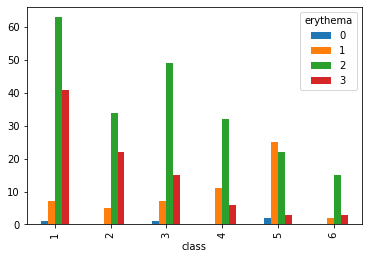

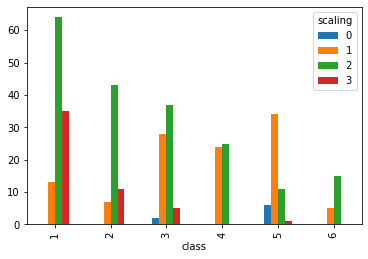

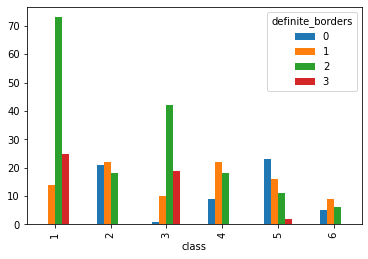

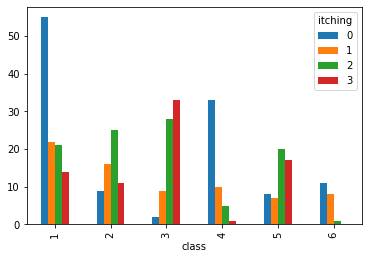

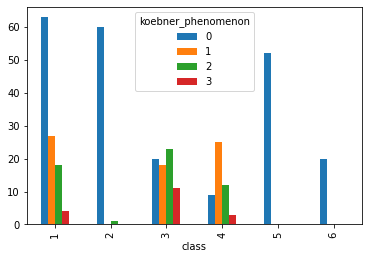

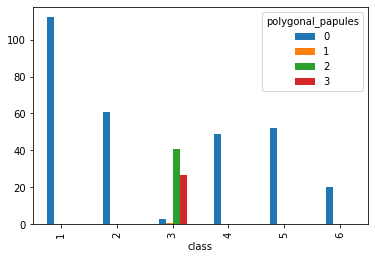

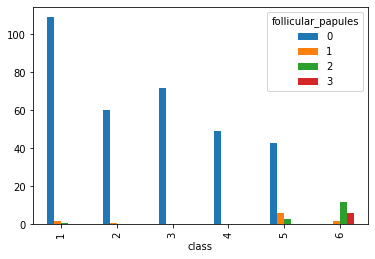

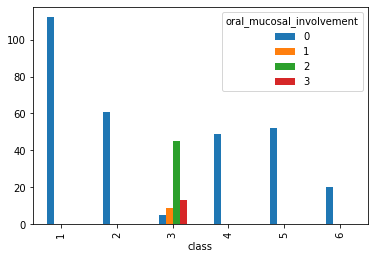

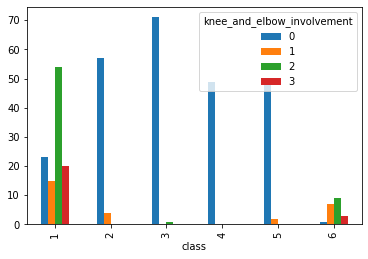

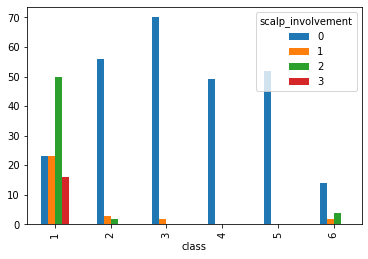

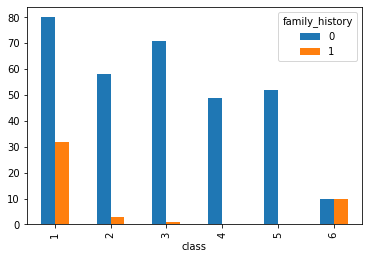

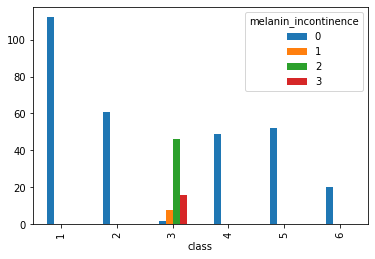

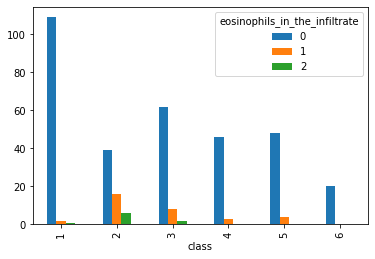

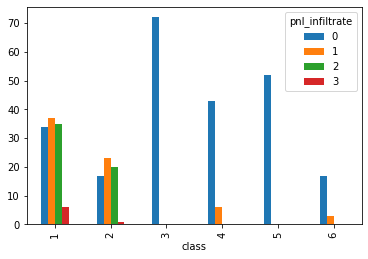

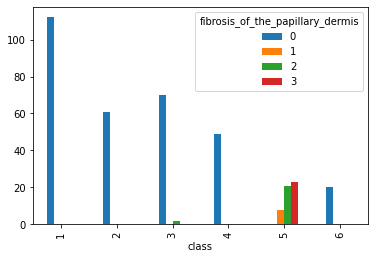

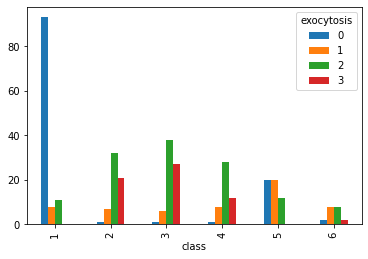

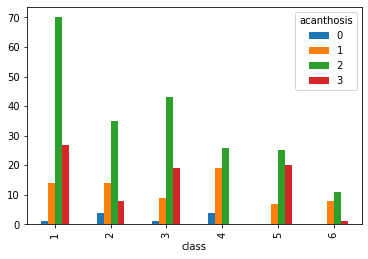

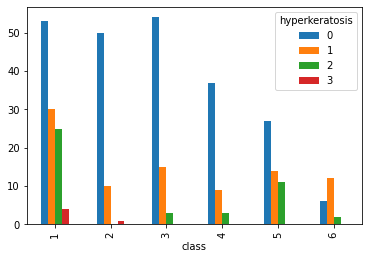

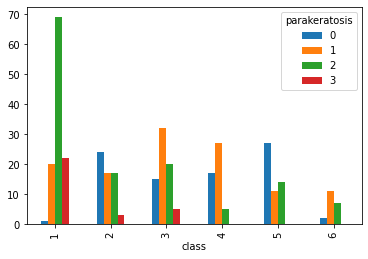

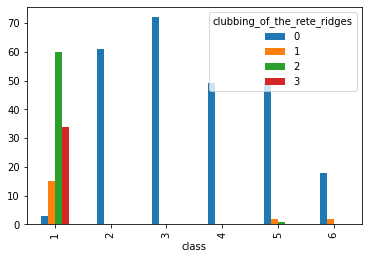

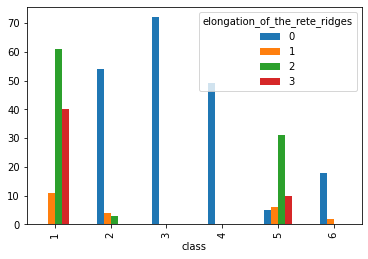

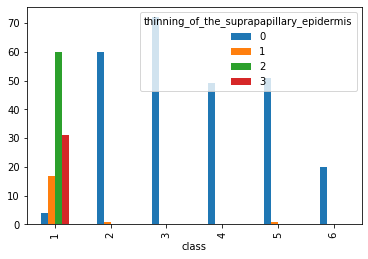

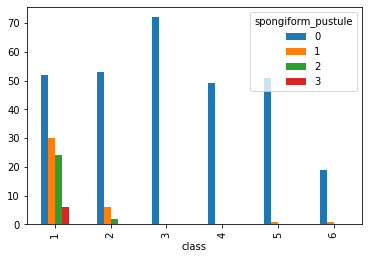

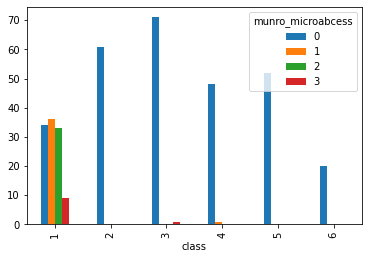

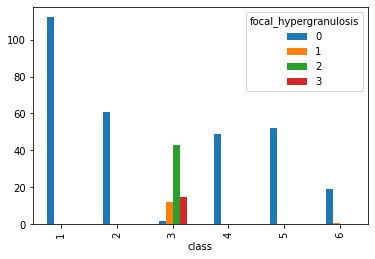

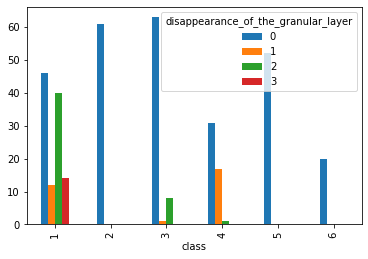

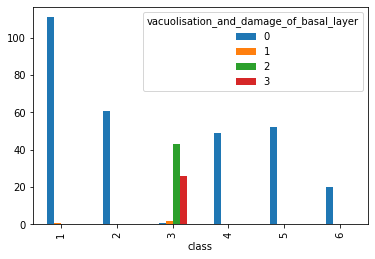

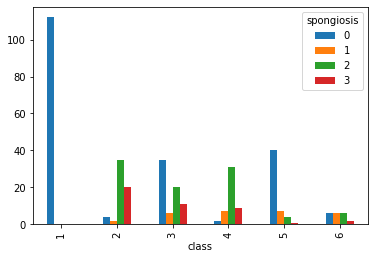

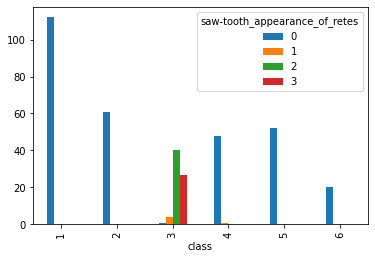

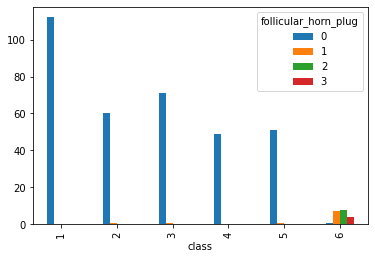

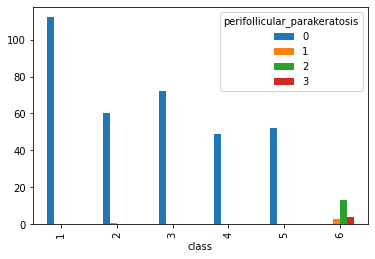

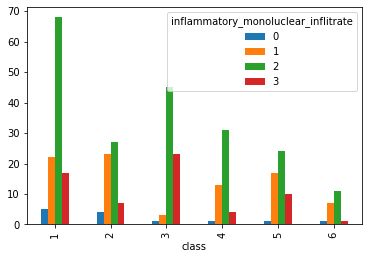

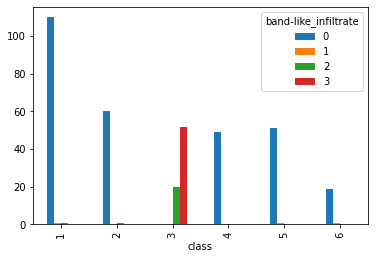

In [10]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html
#for loop for the plotting each of the classes in a bar plot format
for i in twoDataFields:
  plotting = data.groupby(['class',i])[i].agg('count').unstack().plot(kind='bar')     

In [11]:
#create a new col called disease_1
#extracting only those records where the Disease=1 (psoriasis)
#1 for those rows in the new column and marking 0 for the others
data['disease_1'] = [0 if i!=1 else 1 for i in data['class']]
#lets see the result
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,pnl_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,age,class,disease_1
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55.0,2,0
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8.0,1,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26.0,3,0
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40.0,1,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25.0,4,0
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36.0,4,0
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28.0,3,0
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50.0,3,0


In [12]:
#build a linear regression model
#y id for disease 1
#x is for age
lin_model = LinearRegression()
y = data['disease_1'].values.reshape(-1,1)
x = data['age'].values.reshape(-1,1)
lin_model.fit(x,y)
lin_model.intercept_[0], lin_model.coef_[0][0]

(0.1572185157360713, 0.004102608350203247)

In [13]:
y_prediction = lin_model.predict(x)
lr_accuracy_score = r2_score(y, y_prediction)
print('R2 score:',           lr_accuracy_score)
print('Meansquarederror:', mean_squared_error(y, y_prediction))

R2 score: 0.018157733835678758
Meansquarederror: 0.20851211433487568


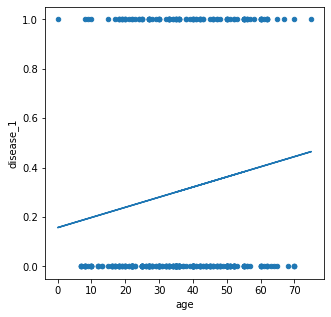

In [14]:
# plot the best fit linear models
data.plot(kind='scatter', x='age', y='disease_1', figsize=(5, 5))
prediction_line=lin_model.predict(x)
plt.plot(x,prediction_line)
plt.show()

An NB classifier model for disease_1 vs. the top ranking (relevant) 5 attributes. Display the overall accuracy and the confusion matrix.

In [15]:
#training and testing
#first will contain the top suspected conditions
first = data[['thinning_of_the_suprapapillary_epidermis','scalp_involvement','clubbing_of_the_rete_ridges','fibrosis_of_the_papillary_dermis','follicular_papules']]
#second will just contain the new column disese1
second = data['disease_1']

In [16]:
#train the model using first containg the topfive and the sencond which has disease1
x_train,x_test,y_train,y_test = train_test_split(first,second,train_size=0.7,test_size = 0.3, random_state=100)
first.shape,second.shape

((366, 5), (366,))

In [17]:
#gaussian nb and bernouli models
#https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/
from sklearn.naive_bayes import GaussianNB, BernoulliNB
nb=BernoulliNB()
#fit the niave base
nb.fit(first,second)

BernoulliNB()

In [18]:
#measure the accuracy score
niave_bays = GaussianNB()
niave_bays_y = data['disease_1'].values.reshape(-1,1)
niave_bays.fit(first,niave_bays_y)
nb_pred = niave_bays.predict(first)
nb_accuracy_score = accuracy_score(niave_bays_y, nb_pred)
print('accuracy_score for NB model :',nb_accuracy_score)

accuracy_score for NB model : 0.9754098360655737


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(33.0, 0.5, 'actual ')

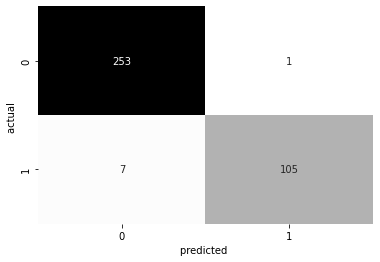

In [19]:
#lets print out the confusion matrix
y_prediction_niaveBays = nb.predict(first)
confusion_nb = confusion_matrix(second,y_prediction_niaveBays)
sns.heatmap(confusion_nb, annot = True,
cbar=False,fmt='0.9g',cmap='Greys')
plt.xlabel('predicted ')
plt.ylabel('actual ')


In [20]:
#priting the accuracy score
print("score",accuracy_score(second,y_prediction_niaveBays))
#looks like a 97% accuracy score

score 0.9781420765027322


A decision tree model (Gini or Entropy) for the entire feature space vs. the disease column. Display the relevant information about the generated tree, and print the confusion matrix.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
#make the cart model using the decision tree classifier
Cart_model= DecisionTreeClassifier(criterion='gini')
Cart_model.fit(first,second)

DecisionTreeClassifier()

[Text(0.5, 0.9, 'thinning_of_the_suprapapillary_epidermis <= 0.5\ngini = 0.425\nsamples = 366\nvalue = [254, 112]'),
 Text(0.2, 0.7, 'clubbing_of_the_rete_ridges <= 1.5\ngini = 0.031\nsamples = 256\nvalue = [252, 4]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 251\nvalue = [251, 0]'),
 Text(0.3, 0.5, 'fibrosis_of_the_papillary_dermis <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.7, 'fibrosis_of_the_papillary_dermis <= 0.5\ngini = 0.036\nsamples = 110\nvalue = [2, 108]'),
 Text(0.7, 0.5, 'clubbing_of_the_rete_ridges <= 0.5\ngini = 0.018\nsamples = 109\nvalue = [1, 108]'),
 Text(0.6, 0.3, 'thinning_of_the_suprapapillary_epidermis <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.3, 'gini = 0.0\nsamples = 105\nvalue = [0,

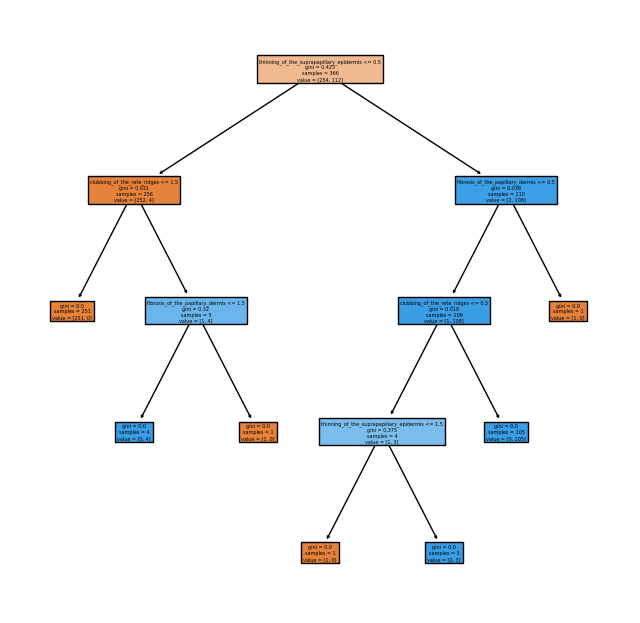

In [22]:
#plotting the desision tree
plt.figure(figsize=(8,8),dpi=100)
tree.plot_tree(Cart_model,feature_names=first.keys(),filled=True)

Text(33.0, 0.5, 'actual')

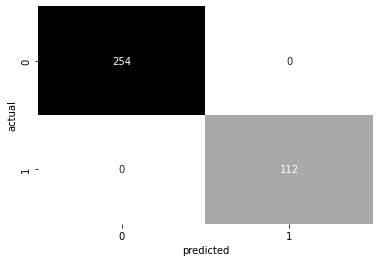

In [23]:
#confustion matrix for the decsion tree classifier
#gini
y_pred_CART= Cart_model.predict(first)
cartmodel_CART= confusion_matrix(second,y_pred_CART)
sns.heatmap(cartmodel_CART, annot = True,
cbar=False,fmt='0.9g',cmap='Greys')
plt.xlabel('predicted')
plt.ylabel('actual')

In [24]:
#print the accuracy score
#accuracy is 100
print(accuracy_score(second,y_pred_CART))

1.0


A random forest model for the entire feature space vs. the disease column. Display the relevant information about one of the generated trees, and print the confusion matrix. Plot the model's .feature_importances_ which is a measure of the accumulation of the impurity decrease within each tree.

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
#https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Remove the labels from the class
random_forest_x= data.drop('class', axis = 1)
random_forest_y= data['class'].values.reshape(-1,1)

In [44]:
classifer_random = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_split=2, min_samples_leaf=1,
                             max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, n_jobs=None, random_state=None,
                             verbose=0, ccp_alpha=0.0, max_samples=None)

classifer_random.fit(random_forest_x,random_forest_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(max_depth=6)

In [ ]:
#trouble with random forrests

Summary: In this project we took a look at instances of dermatology cancer occurrences. The linear regression model the showed the division between age and disease.We used niave bays with the top five classifiers of disease. Our disison tree where we used different values for leaf nodes and depth.